# **Concepts Covered:**

- <a href = #link1>Binomial Distribution</a>
- <a href = #>Uniform Distribution [*additional content*]</a>
- <a href = #link3>Normal Distribution</a>





**Note** : The 'Uniform Distribution' section is available as additional content. Please refer the hands-on notebook in 'Week 1: Additional Learning Material'.

# <a name='link1'>**Binomial Distribution**</a>

## Problem statement 
80% of all the visitors to Lavista Museum end up buying souvenirs from the souvenir shop at the Museum. On the coming Sunday, if a random sample of 10 visitors is picked:

 1. Find the probability that every visitor will end up buying from the souvenir shop
 2. Find the probability that a maximum of 7 visitors will buy souvenirs from the souvenir shop

Let's check first whether we satisfy the assumptions of the binomial distribution.
*  There are only two possible outcomes (success or failure) for each trial – A visitor will buy souvenirs from the souvenir shop or not (yes or no).
* Number of trials (n) is fixed - There are 10 visitors in the sample.
* Each trial is independent of the other trials - It is reasonable to assume that the buying activity of visitors is independent.
* The probability of success (p) is the same for each trial - The probability of success for each visitor is 0.8.

### Let's import the libraries 

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

#%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

### Let's estimate the probability distribution of visitors

In [2]:
# declare the sample size in variable n which represents the number of visitors selected randomly
n = 10

In [3]:
# declare p which represents the probability of success, i.e., the probability that a visitor will end up buying a souvenir
p = 0.80

In [4]:
# declare different possible number of visitors selected in a numpy array
k = np.arange(0,11)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

The probability function of Binomial Distribution provides the probability for  x  number of successes from n trials where  p is the probability of success   

>$P(X=x)= {n\choose x}p^x(1-p)^{n-x}$


Here, we know that:

* n ( number of visitors selected randomly ) = 10
* p ( probability of success i.e., the probability that a visitor will end up buying a souvenir) = 0.80
* q ( probability of failure i.e., the probability that a visitor will not end up buying a souvenir) = 1 - 0.80 = 0.20
* x ( number of successes ) = 10


We will use binom.pmf() to calculate this probability function which provides the probability for the number of visitors (out of n=10) that will end up buying souvenirs from the souvenir shop.

In [5]:
# import the required function
from scipy.stats import binom

# use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k=k, n=n, p=p)

Here, [`binom.pmf(k,n,p)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) is used to calculate the probability $P(X=k)$   and generate the probability distribution.

* `binom` stands for binomial discrete random variable
* `pmf` stands for probability mass function

The `binom.pmf()` function takes three parameters:

* `k`: Scalar or array of different possible number of visitors
* `n`: Sample size
* `p`: Probability of success of an event





In [6]:
binomial

array([1.02400000e-07, 4.09600000e-06, 7.37280000e-05, 7.86432000e-04,
       5.50502400e-03, 2.64241152e-02, 8.80803840e-02, 2.01326592e-01,
       3.01989888e-01, 2.68435456e-01, 1.07374182e-01])

As you can see **binomial** is the array of probabilities for different number of successes. Let us visualize the same in the following plot.

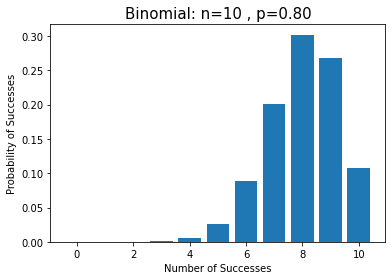

In [7]:
# plot the distribution
plt.bar(k, binomial) # make a bar plot
plt.title("Binomial: n=%i , p=%.2f" % (n, p), fontsize=15) # set the title
plt.xlabel("Number of Successes") # set the x-axis label
plt.ylabel("Probability of Successes") # set the y-axis label
plt.show() # display the plot

The last element of this **binomial** array represents the probability when the number of successes is 10 (which means that all 10 visitors (out of 10 selected randomly) will buy souvenirs from the souvenir shop)

In [8]:
binomial[10]

0.10737418240000006

The above probability shows that the probability of exactly 10 successes is  ~ 0.11.

Now, we are interested in knowing the probability of at most 7 successes which means what is the probability that out of 10 randomly selected visitors, a maximum of 7 visitors will buy souvenirs from the souvenir shop.

Here, we need to calculate the probability for P(X<=7). CDF is used to calculate the cumulative probability.



**CDF:** of a Random variable (X) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as below.

>$F_X(x) = P(X\leq x)$

In our case, Random Variable (X) is the number of visitors who will buy souvenirs from the souvenir shop.

$P(X\leq 7)$


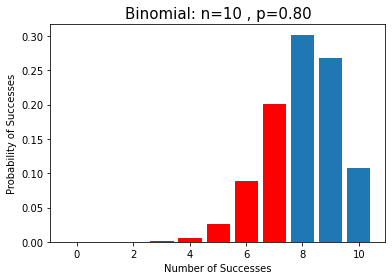

In [9]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
barl = plt.bar(k, binomial) # make a bar plot
plt.title("Binomial: n=%i , p=%.2f" % (n, p), fontsize=15) # set the title
plt.xlabel("Number of Successes") # set the x-axis label
plt.ylabel("Probability of Successes") # set the y-axis label
for i in range(0, 8):
    barl[i].set_color("r") # color the bars in red where number of successes is less than 8
plt.show() # display the plot

In the above graph, the **red** region represents P(X<=7).
Let's calculate the probability that out of 10 randomly selected visitors, a maximum of 7 will buy souvenirs from the souvenir shop. We will use binom.cdf() for this.

In [10]:
# calculate cdf
binom.cdf(k=7, n=n, p=p)

0.32220047359999987

Here, [`binom.cdf(k,n,p)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) function is used to calculate the cumulative probability $P(X<=k)$

The `binom.cdf()` function also takes three parameters like `binom.pmf()`


*   `k` : Scalar or array of different possible number of visitors
*   `n` : Sample size
*   `p` : Probability of success of an event

### Conclusion: 

There is a 10.74% chance that every visitor will end up buying souvenirs from the souvenir shop.

There is a 32.22% chance that a maximum of 7 visitors out of 10 will buy souvenirs from the souvenir shop.

Let's try to change the probability of success (probability that each visitor will buy souvenirs from the souvenir shop) to different values like 60%,70%,90%,95% and visualize how the shape of the distribution changes.

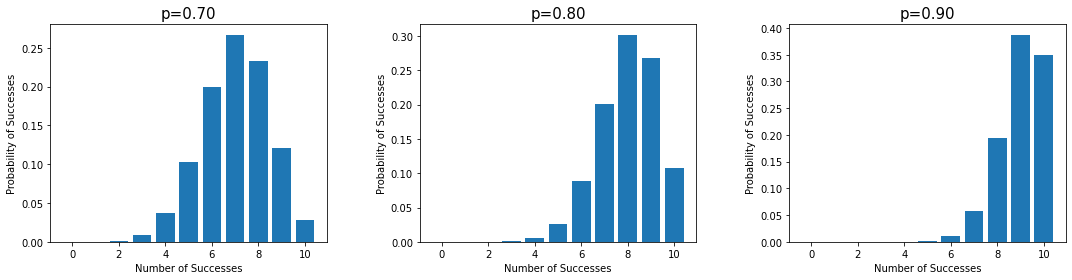

In [11]:
plt.figure(figsize=(15, 4))

plt.subplot(131)
binomial_70 = binom.pmf(k, n, p=0.7) # generate the probability distribution

# plot the distribution of the same
plt.bar(k, binomial_70) # plot the bar plot
plt.title("p=%.2f" % (0.7), fontsize=15) # set the plot title
plt.xlabel("Number of Successes") # set the x-axis label
plt.ylabel("Probability of Successes") # set the y-axis label

plt.subplot(132) # add an axes to the current figure
binomial_80 = binom.pmf(k, n, p=0.8) # generate the probability distribution

# plot the distribution of the same
plt.bar(k, binomial_80) 
plt.title("p=%.2f" % (0.8), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.subplot(133)
binomial_90 = binom.pmf(k, n, p=0.9)

# plot the distribution of the same
plt.bar(k, binomial_90)
plt.title("p=%.2f" % (0.9), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.tight_layout(w_pad=5)

### Conclusion:

It is clear from the above plot that the shape of the distribution changes as the value of p (probability of success) changes.

# <a name='link3'>**Normal Distribution**</a>

## Problem statement

A testing agency wants to analyze the complexity of SAT Exam 2020. They have collected the SAT scores of 1000 students in "sat_score.csv". Let's answer some of the questions that will help to decide the complexity of SAT exam 2020.


 
1. Calculate the probability that a student will score less than 800 in SAT exam
2. Calculate the probability that a student will score more than 1300 in SAT exam
3. Calculate the minimum marks a student must score in order to secure 90th percentile
4. Calculate the minimum marks a student must score in order to be in the top 5%



### Reading the Data into the Dataframe

In [12]:
sat_score = pd.read_csv("sat_score.csv") # read the dataset
sat_score.head() # see first 5 rows of the dataset

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


### Calculating the mean and standard deviation (parameters) of the SAT score 



In [13]:
# import the required function
from scipy.stats import norm

# estimate the mean and standard deviation of the SAT scores data
mu = sat_score["score"].mean() 
sigma = sat_score["score"].std()
print("The estimated mean is", round(mu, 2))
print("The estimated standard deviation is", round(sigma, 2))

The estimated mean is 1007.46
The estimated standard deviation is 204.43


### Plotting the Distribution 

It  will help us analyze the shape of the data and visualize the PDF of normal distribution using the parameters (mean (mu) and Standard deviation (sigma)) from the data.

The [`norm.pdf(x, loc, scale)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) function will be used to calculate the probability density.

The `norm.pdf()` function takes three parameters

*   `x` : Scalar or Array of numbers
*   `loc` : Sample mean
*   `scale` : standard deviation


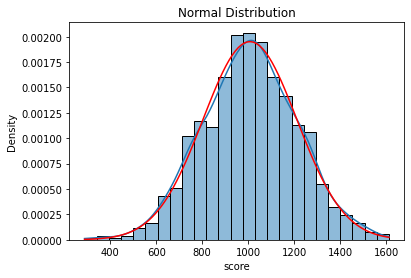

In [14]:
# calculate the pdf of SAT scores using norm.pdf()
density = pd.DataFrame() # create an empty DataFrame
density["x"] = np.linspace(
    sat_score["score"].min(), sat_score["score"].max(), 100
) # create an array of 100 numbers in between the min and max score range and store it in the first column of the empty DataFrame
density["pdf"] = norm.pdf(density["x"], mu, sigma) # calculate the pdf() of the created numbers and store it in another column named 'pdf'

fig, ax = plt.subplots() # create the subplot
sns.histplot(sat_score["score"], ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

**Insight:**  As you can see in the above plot, there are two curves red and blue. Blue curve represents the shape of data distribution and the red curve represents the PDF (Probability density function). This data is approximately normal. Thus, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

>$X \sim N(\mu, \sigma^2)$

**Calculate the probability that a student will score less than 800 in SAT exam.**

In [15]:
# find the cumulative probability
# norm.cdf() calculates the cumulative probability
prob_less_than_800 = norm.cdf(800, mu, sigma)
print(
    "The probability that a student will score less than 800 is",
    round(prob_less_than_800, 4),
)

The probability that a student will score less than 800 is 0.1551


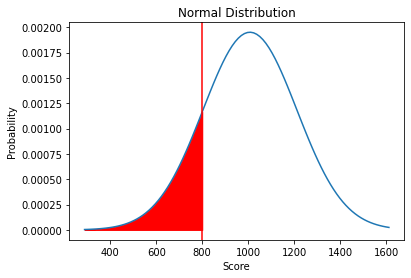

In [16]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"]) # plot the pdf of the normal distribution
plt.axvline(x=800, c="r") # draw a red vertical line at x = 800
x1 = np.linspace(density["x"].min(), 800, 50) # create an array of 50 numbers between min SAT score and 800
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r") # fill the specified region with red color
plt.xlabel("Score") # set the x-axis label
plt.ylabel("Probability") # set the y-axis label
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

**Calculate the probability that a student will score more than 1300 in SAT exam.**

In [17]:
# find the cumulative probability and subtract it from 1 to calculate the probability that a student will score more than 1300
prob_greater_than_1300 = 1 - norm.cdf(1300, mu, sigma)
print(
    "The probability that a student will score more than 1300 is",
    round(prob_greater_than_1300, 4),
)

The probability that a student will score more than 1300 is 0.0762


Here, [norm.cdf(x, loc, scale))](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) function is used to calculate the probability density.

The `norm.cdf()` function takes three parameters

*   `x` : Scalar or Array of numbers
*   `loc` : Sample mean
*   `scale` : standard deviation

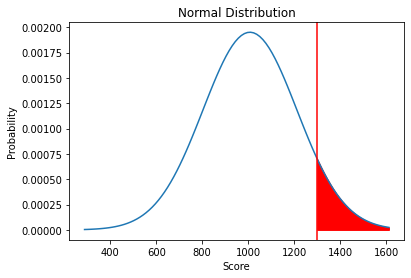

In [18]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=1300, c="r")
x1 = np.linspace(1300, density["x"].max(), 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

**Calculate the minimum marks a student must score in order to be in the 90th percentile**

In [19]:
# calculate the 90th percentile score using ppf() function
# norm.ppf() calculates the percentile point
score_90th_percentile = norm.ppf(0.90, mu, sigma)
print("The 90th percentile score should be", round(score_90th_percentile))

The 90th percentile score should be 1269


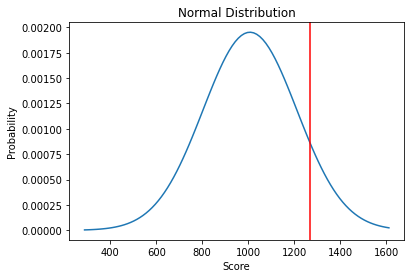

In [20]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=score_90th_percentile, c="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

**Calculate the minimum marks a student must score in order to be in the top 5%**

In [21]:
# calculate the 95th percentile score using ppf() function
score_top_five_percent = norm.ppf(0.95, mu, sigma)
print("The minimum score to be in top 5% should be", round(score_top_five_percent))

The minimum score to be in top 5% should be 1344


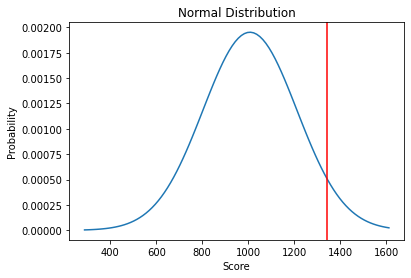

In [22]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=score_top_five_percent, c="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

**Conclusion:** 

1) Only 15.51% of students will score below 800 and 7.62% of students will score above 1300. It shows that the 2020 SAT exam's complexity is moderate. 

2) Students should score at least 1269 to secure the 90th percentile.

3) Students should score at least 1344 to be in the top 5%.

### Standardization of Normal Variables

Suppose we know that the SAT scores are normally distributed with mean 1000 and standard deviation 200 and ACT scores are normally distributed with mean 20 and standard deviation 5. 

A college provides admission only on the basis of SAT and ACT scores. The college admin decides to give the top performer fellowship to the student who has performed the best among all applicants. The highest score received from applicants who appeared for SAT is 1350 and the highest score received from applicants who appeared for ACT is 30. 

Help the college to choose the best candidate for the fellowship!

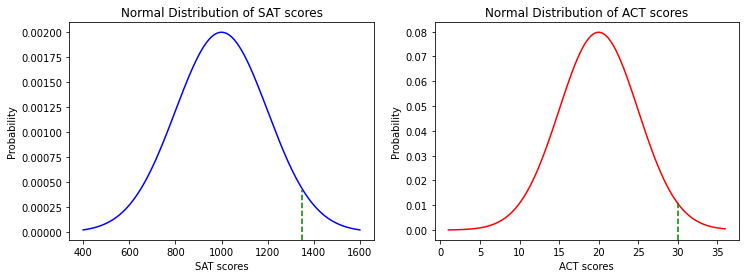

In [23]:
# plot the two distribution for SAT and ACT scores
from scipy.stats import norm
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4)) # set the axes of various plots to draw multiple plots in the same figure

# we will first create the distribution plot for SAT scores
x = np.linspace(400, 1600, 1000)
'''
Here, we are creating an array of numbers spaced evenly within the interval specified.
As the mean is 1000 and standard deviation (std) 200, the array of numbers
are evenly spaced between 400 and 1600 (mean - 3*std and mean + 3*std).
This array will be used as the x-axis of the plot.
'''
ax1.plot(x, norm.pdf(x, loc = 1000, scale = 200), color = 'b')
'''
plot the probability density function
loc keyword specifies the mean
scale keyword specifies the standard deviation
'''
ax1.set_title('Normal Distribution of SAT scores') # set the title of the plot
ax1.set_xlabel('SAT scores') # set the label for x-axis
ax1.set_ylabel('Probability') # set the label for y-axis
ax1.axvline(1350, ymax = 0.23, linestyle = '--', color = 'green') # add a vertical line having green color across the axes to mark the point 1350

# we will now create a similar plot as above for the ACT scores
x1 = np.linspace(1, 36, 100)
ax2.plot(x1, norm.pdf(x1, loc = 20, scale = 5), color = 'r')
ax2.set_title('Normal Distribution of ACT scores')
ax2.set_xlabel('ACT scores')
ax2.set_ylabel('Probability')
ax2.axvline(30, ymax = 0.18, linestyle = '--', color = 'green')
plt.show()

In the above plot, the blue curve represents the distribution of SAT scores and the red curve represents the distribution of ACT scores. The highest scores of the applicants in SAT and ACT exams are dotted with green lines in the respective distributions. However, it is difficult for us to compare the raw highest scores in the above plot. Thus, we need to standardize the two scores and compare their Z-scores.

In [24]:
# find the Z-score of highest scorer in SAT among all the applicants
top_sat = (1350 - 1000) / 200
print('The Z-score of highest scorer in SAT among all the applicants', top_sat)
# find the Z-score of highest scorer in ACT among all the applicants
top_act = (30 - 20) / 5
print('The Z-score of highest scorer in ACT among all the applicants', top_act)

The Z-score of highest scorer in SAT among all the applicants 1.75
The Z-score of highest scorer in ACT among all the applicants 2.0


Let's plot the standard normal distribution and visualize the above standardized scores.

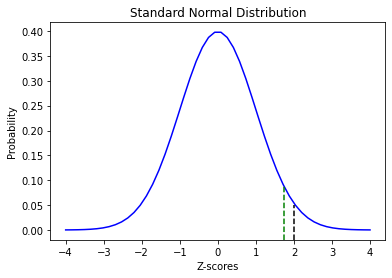

In [25]:
# plot the standard normal distribution
# and visualize the standardized scores
# We are plotting the distributions here to better visualize the calculations.
fig, ax = plt.subplots()
x = np.linspace(-4,4,50)
ax.plot(x, norm.pdf(x, loc = 0, scale = 1), color = 'b')
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probability')
ax.axvline(top_sat, ymax = 0.25, linestyle = '--', color = 'green')
ax.axvline(top_act, ymax = 0.16, linestyle = '--', color = 'black')
plt.show()

In the above plot, the green line represents the standardized highest SAT score of the applicants which is 1.75 standard deviations above the mean and the black line represents the standardized highest ACT score of the applicants which is 2 standard deviations above the mean.

This means that among the applicants, the highest scorer in ACT performed better than the highest scorer in SAT.

Thus, the top performer fellowship should be given to the applicant who has scored highest in ACT.